<a href="https://colab.research.google.com/github/arindamchoudhary047/EDA-Analysis/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dataset

In [1]:
!pip install opendatasets --upgrade
#Downloading dataset:
import opendatasets as od

download_url = "https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities"
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: arindamchoudhary047
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities


100%|██████████| 12.9M/12.9M [00:00<00:00, 677MB/s]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


ctfile = '/content/daily-temperature-of-major-cities/city_temperature.csv'
df = pd.read_csv(ctfile, low_memory = False)


See the table here:

In [3]:
pd.read_csv(ctfile, low_memory=False)

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8


Numeric Dataframe

In [4]:
numerics = ['int16','int32','int64','float16','float32','float64']
numerics_df = df.select_dtypes(include=numerics)

Min, Max, Mean

In [5]:
numerics_df.agg(['min','max','mean'])

,Month,Day,Year,AvgTemperature
min,1.000000,0.000000,200.000000,-99.000000
max,12.000000,31.000000,2020.000000,110.000000
mean,6.469163,15.716816,2006.623909,56.004921


----

In [6]:
nullpercent = df.isna().sum() * 100 / len(df)
print(nullpercent[nullpercent != 0])
#Just telling which column has null values in percentage.
# So will be not using states column.

State    49.925215
dtype: float64


In [7]:
# Dropped State Column
df2 = df.drop("State", axis = 1)
#Removed error years
df2 = df2.query('Year != 200 and Year != 201')
#Remove -99 reading:
df2 = df2[df2.AvgTemperature != -99]
#Removed 2020 as only have 30k readings (only first 5 months have been provided)
df2 = df2[df2.Year != 2020]



EDA Analysis Of "df2"

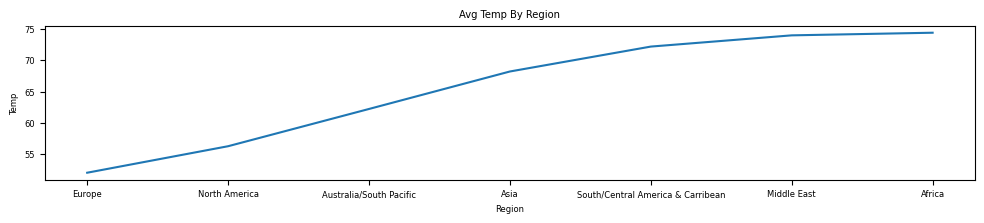

In [8]:
##AvgTemp By Region

regtemp = df2.groupby("Region")["AvgTemperature"].mean()
regtemp = regtemp.sort_values()
plt.figure(figsize = (12,2))
plt.tight_layout()
plt.rcParams.update({'font.size': 6})

plt.xlabel("Region")
plt.ylabel("Temp")
plt.title("Avg Temp By Region")

plt.plot(regtemp)
plt.show()

Region Specific Datasets

In [9]:
#creating datasets specific to each region:
europe = df2.query('Region == "Europe"')
africa = df2.query('Region == "Africa"')
asia = df2.query('Region == "Asia"')
australia = df2.query('Region == "Australia/South Pacific"')
middlest = df2.query('Region == "Middle East"')
namerica = df2.query('Region == "North America"')
samerica = df2.query('Region == "South/Central America & Carribean"')

Global Avg Graphs

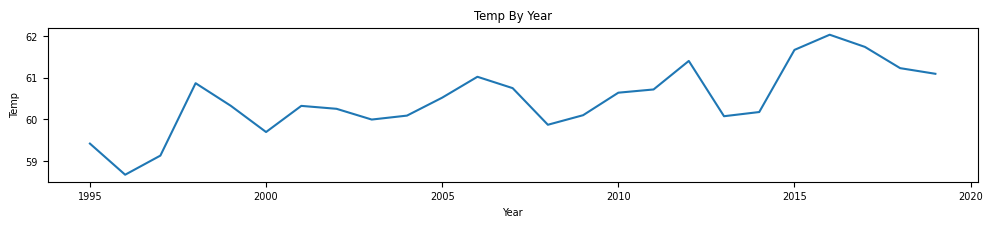

In [10]:
##Temp By Year (Global)

yeartemp = df2.groupby("Year")["AvgTemperature"].mean()
yeartemp = yeartemp.sort_index()

plt.figure(figsize = (12,2))
plt.tight_layout()
plt.rcParams.update({'font.size': 7})

plt.xlabel("Year")
plt.ylabel("Temp")
plt.title("Temp By Year")


plt.plot(yeartemp)
plt.show()

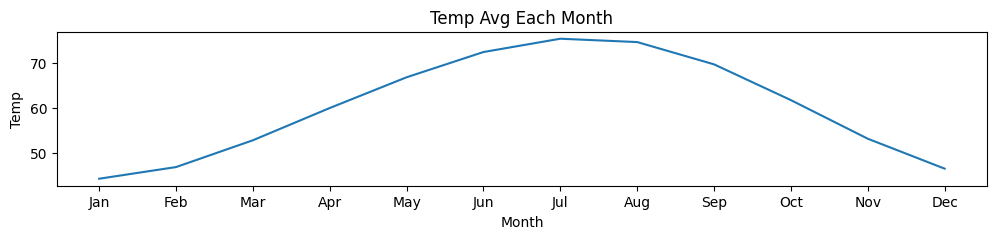

In [11]:
##Temp Each Month (Global)

#Renamed month number with month name

mondic = {1 : 'Jan',
          2 : 'Feb',
          3 : 'Mar',
          4 : 'Apr',
          5 : 'May',
          6 : 'Jun',
          7 : 'Jul',
          8 : 'Aug',
          9 : 'Sep',
         10 : 'Oct',
         11 : 'Nov',
         12 : 'Dec'}


#Below was created into a function later.
montemp = df2.groupby("Month")["AvgTemperature"].mean()
montemp = montemp.rename(index = mondic)
montemp.sort_index()

plt.figure(figsize = (12,2))
plt.tight_layout()
plt.rcParams.update({'font.size': 10})

plt.xlabel("Month")
plt.ylabel("Temp")
plt.title("Temp Avg Each Month")

plt.plot(montemp)
plt.show()

Hottest Day Info

In [12]:
dftmax = df2["AvgTemperature"].max()
dfhottest = df2.query('AvgTemperature == @dftmax')
print(dfhottest)

              Region Country    City  Month  Day  Year  AvgTemperature
1034962  Middle East  Kuwait  Kuwait      8    1  2012           110.0


Coldest Day Info

In [13]:
coldest = df2[df2.AvgTemperature == df2.AvgTemperature.min()]
print(coldest)

                Region Country       City  Month  Day  Year  AvgTemperature
1499140  North America      US  Fairbanks     12   31  1999           -50.0


Region Specific Graphs

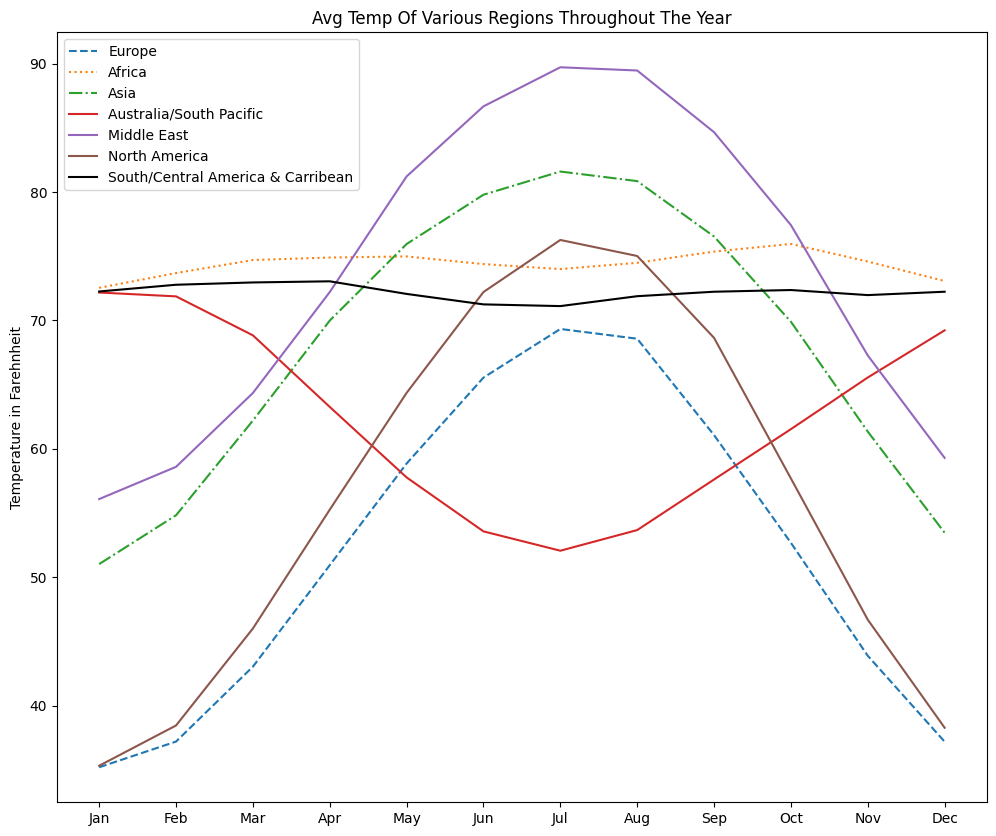

In [77]:
##Temp Each Month (Region)

##Function for monthly avg
def tempeachmonth(dataset0):
  dataset0 = (dataset0.groupby("Month")["AvgTemperature"].mean()).rename(index = mondic)
  return dataset0

plt.figure(figsize = (12,10))
plt.plot(tempeachmonth(europe), linestyle = "--", label = "Europe")
plt.plot(tempeachmonth(africa), linestyle = ":", label = "Africa")
plt.plot(tempeachmonth(asia), linestyle = "-.", label = "Asia")
plt.plot(tempeachmonth(australia), label = "Australia/South Pacific")
plt.plot(tempeachmonth(middlest), label = "Middle East")
plt.plot(tempeachmonth(namerica), label = "North America")
plt.plot(tempeachmonth(samerica), label = "South/Central America & Carribean")

plt.ylabel("Temperature in Farehnheit")
plt.title("Avg Temp Of Various Regions Throughout The Year")
plt.legend()

plt.show()

Which year had the highest and lowest global average temperature?

In [28]:
print(yeartemp.sort_values(ascending = False))
#2016 was hottest year.
#1996 was coldest year.

Year
2016    62.033458
2017    61.741110
2015    61.669438
2012    61.404529
2018    61.231365
2019    61.096138
2006    61.024588
1998    60.870440
2007    60.751953
2011    60.720235
2010    60.642857
2005    60.523740
1999    60.327687
2001    60.326280
2002    60.256346
2014    60.178842
2009    60.102736
2004    60.092934
2013    60.078363
2003    59.998360
2008    59.873359
2000    59.699026
1995    59.421659
1997    59.133617
1996    58.674830
Name: AvgTemperature, dtype: float64


Which year had the largest range of temperature (max - min)?

In [76]:
def ytr(year):
    yeartemps = df2[df2["Year"] == year]["AvgTemperature"]
    return (yeartemps.max() - yeartemps.min())

i = df2["Year"].min()
m = 1
year_of_maxrange = i

for z in range(len(df2["Year"].unique())):

  if (ytr(i) > m):
    m = (ytr(i))
    year_of_maxrange = i

  i = i + 1

print(m,"&", year_of_maxrange)

158.1 & 1999


Largest Standard Deviation Of Temps In Which Region?

In [84]:
def largeststd(df):
  return df["AvgTemperature"].std()

regionlist = [africa,samerica,namerica,australia,middlest,europe,asia]

print([largeststd(df) for df in regionlist])

[9.259480705224101, 10.794950641998465, 19.335244231984362, 9.705009752275908, 16.79049302681614, 15.226168423995954, 19.694626920502397]


Do all regions show similiar global warming trends over time?